In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#checking metadata of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#checking null values
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null vlaues are present in dataset

In [ ]:
#checking unique value and there counts
for i in df.columns:
  print('\n','-'*15,i,'-'*15)
  print(df[i].value_counts())


 --------------- Age ---------------
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

 --------------- Workclass ---------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 --------------- Fnlwgt ---------------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

 --------------- Education ---------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576

education feature has already encoded as education_num so  I will exclude the education features

In [ ]:
#listing out categorical features
cat_f=[]
for i in df.columns:
  if df[i].dtype == 'O' and i != 'Income':
    cat_f.append(i)

In [ ]:
#check statistical analysis
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


capital gain and loss are not well distributed

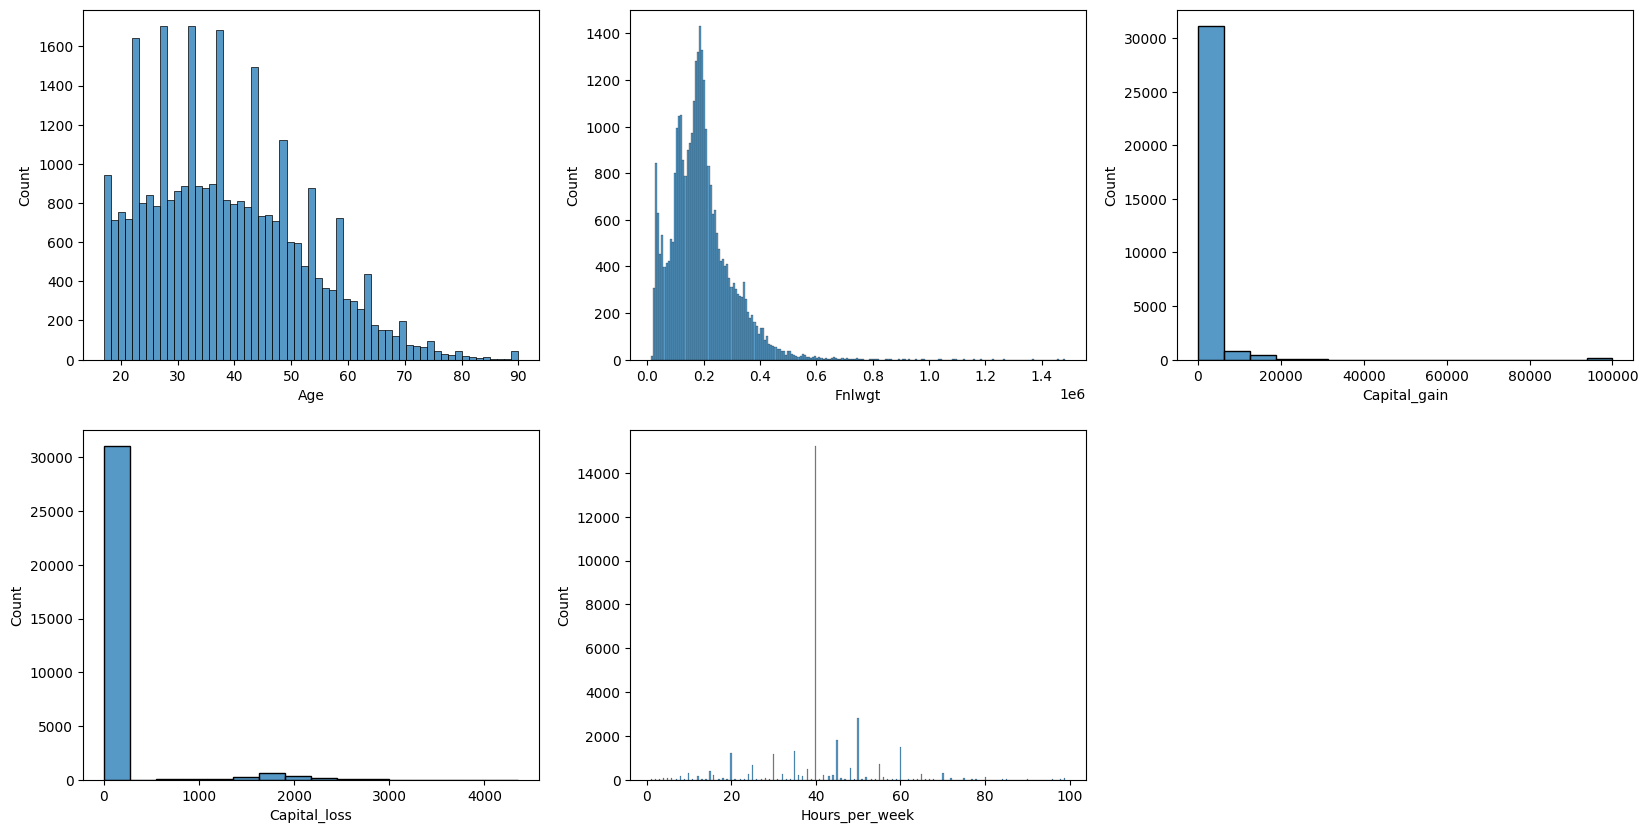

In [ ]:
#plot distribution
plt.figure(figsize=(20,10))
plotno=1
for i in ['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']:
  plt.subplot(2,3,plotno)
  sns.histplot(data=df,x=df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

age and fnlwgt have broad distribution but capital gain and loss not well distributed ,so may be I'll exclude it

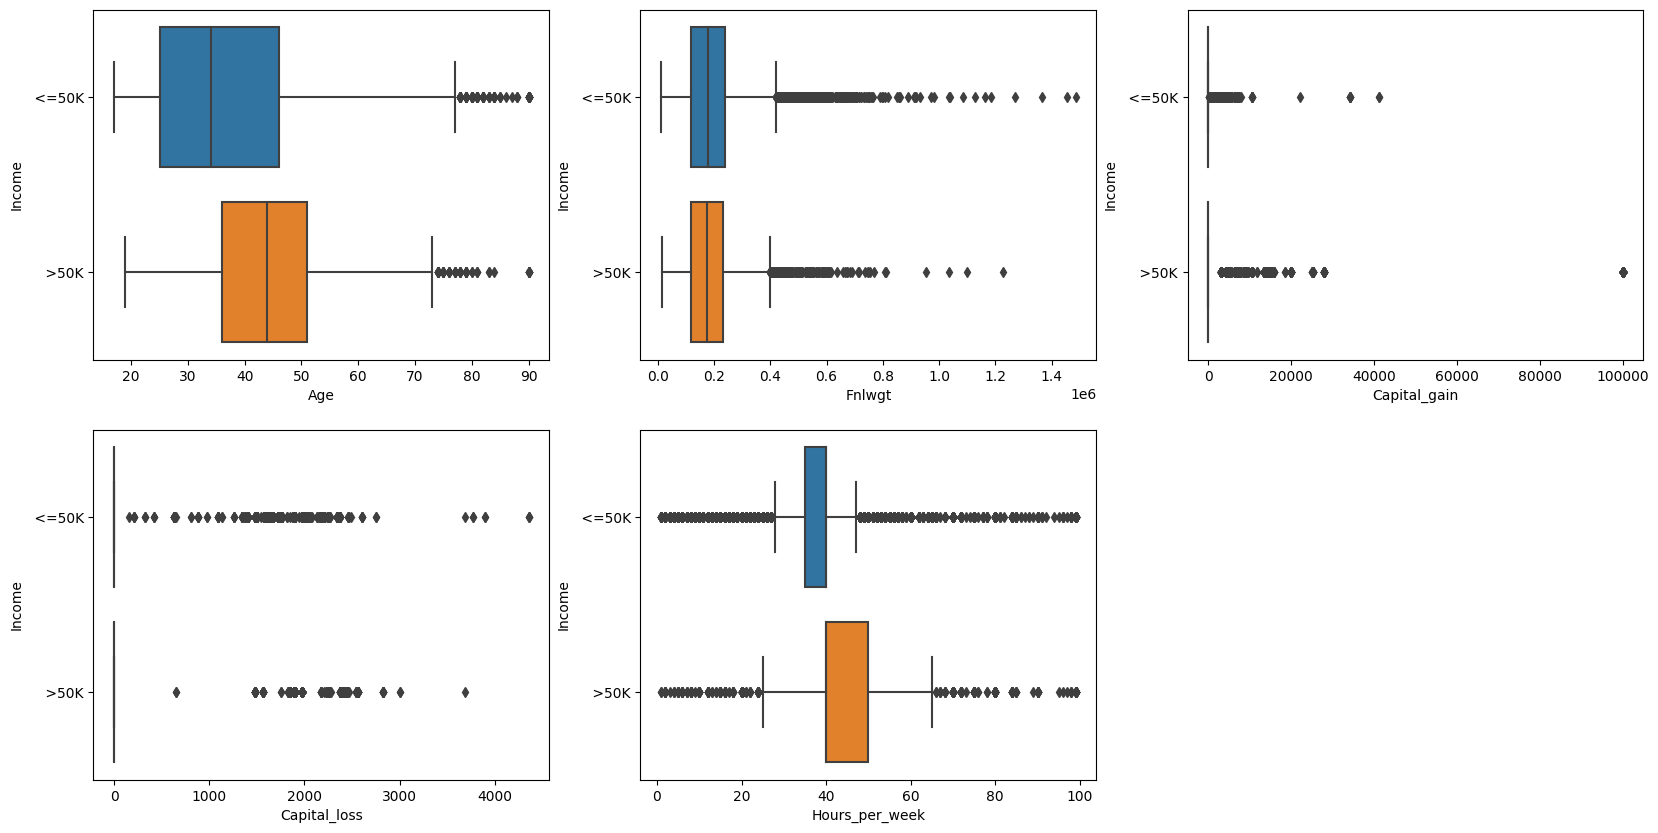

In [ ]:
#plot relation of numerical features with label
plt.figure(figsize=(20,10))
plotno=1
for i in ['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']:
  plt.subplot(2,3,plotno)
  sns.boxplot(x=df[i],y=df['Income'])
  plt.xlabel(i)
  plotno+=1
plt.show()

The person who earns more than 50k has age between 35 and 50  
The person who works 40 hours to 50 hr a week has high income  


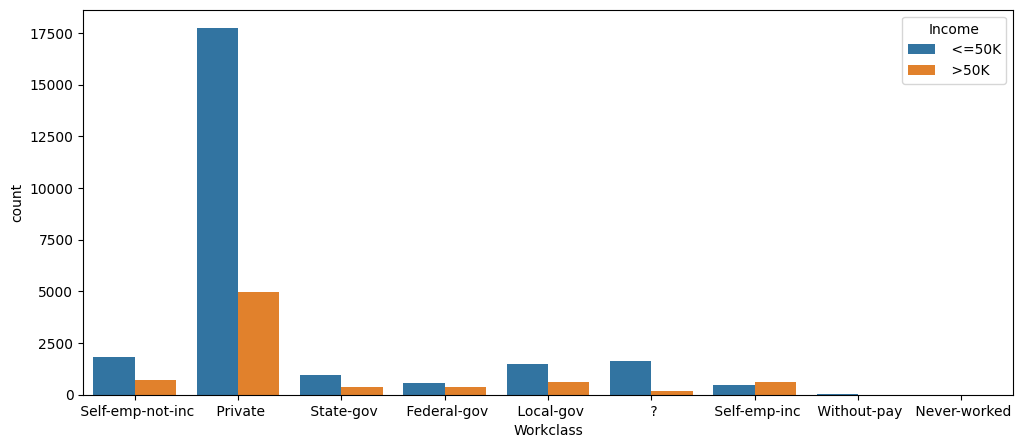

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['Workclass'],hue=df['Income'])
plt.show()

workclass feature is well distributed among the labels,

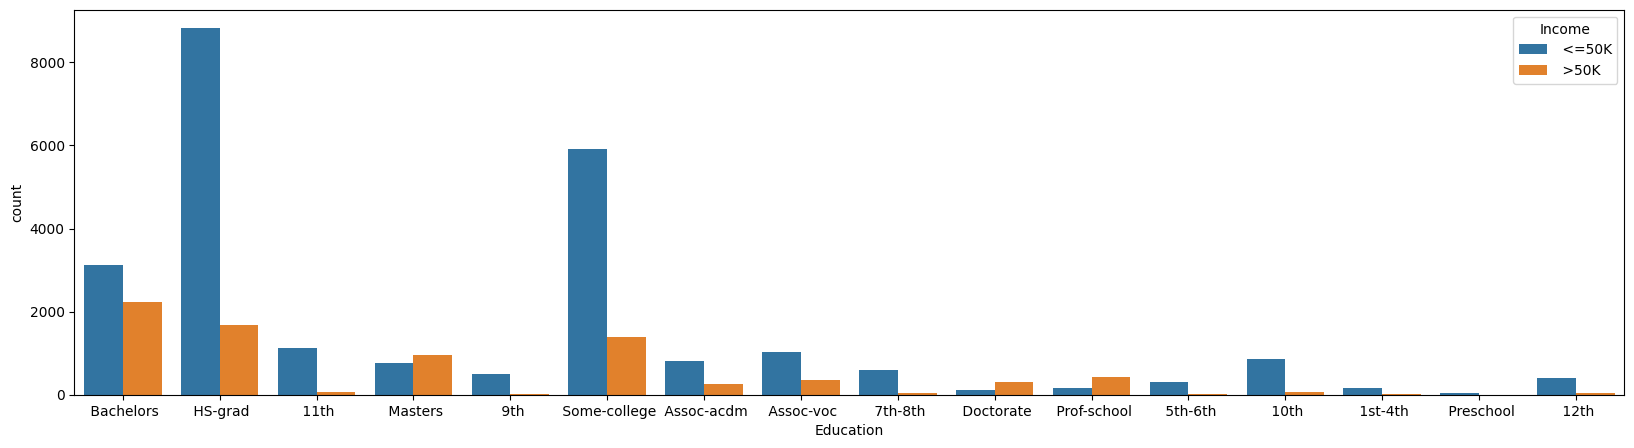

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x=df['Education'],hue=df['Income'])
plt.show()

The person with bachelors, master , doctorate and prof_scool education more likely to earn more than 50k

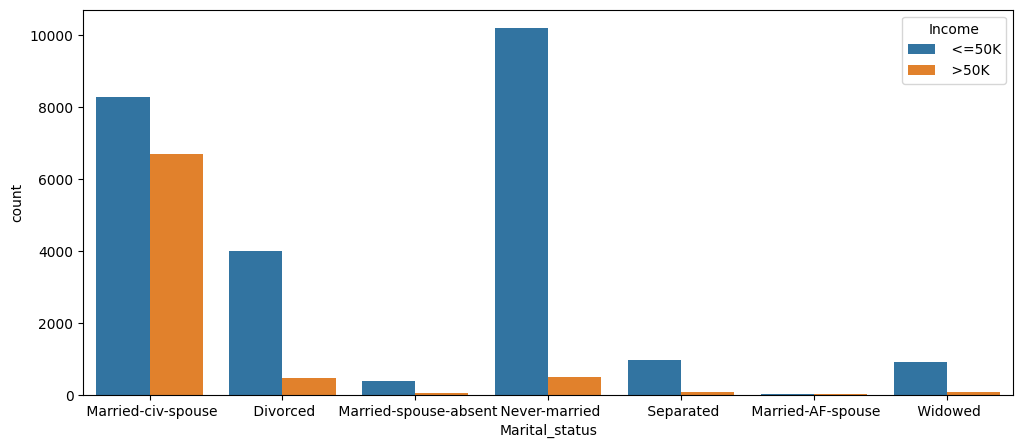

In [ ]:
#check marital status relation with income
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['Marital_status'],hue=df['Income'])
plt.show()

Half of the croud who's marital_status is married-cv-spouse are earning more than 50k  
we can consider this features

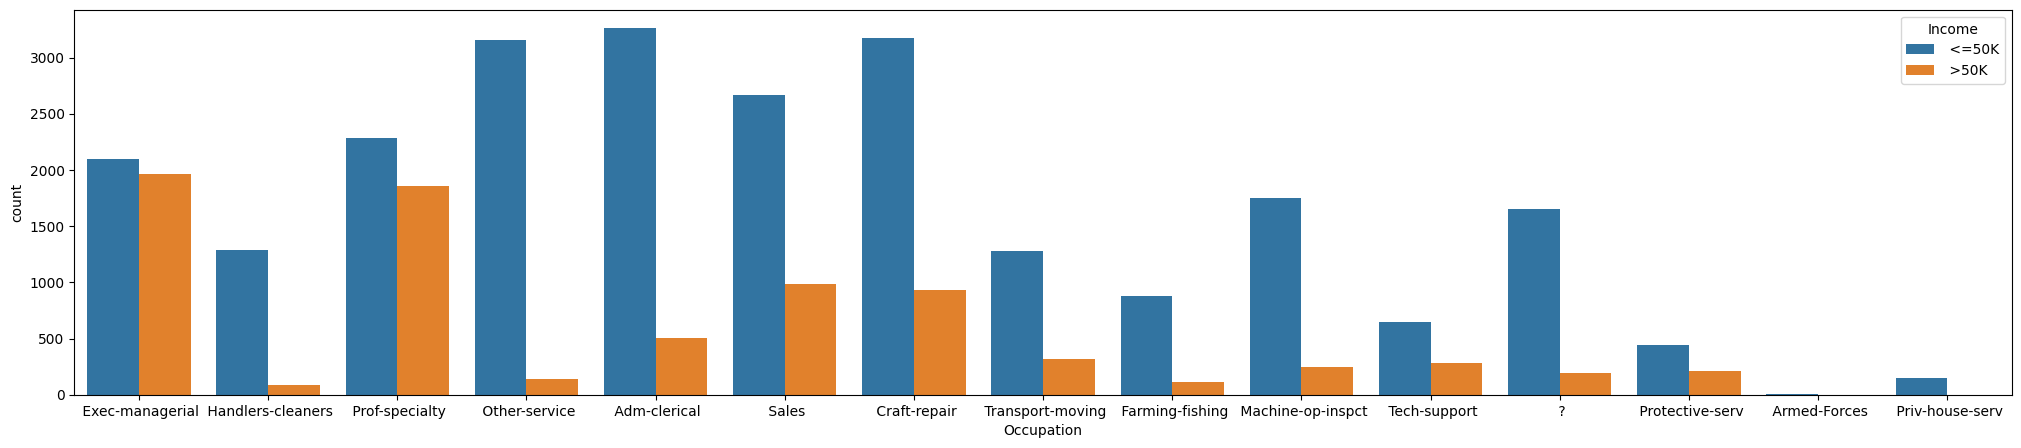

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data=df,x=df['Occupation'],hue=df['Income'])
plt.show()

exec-manager's, prof, tech-support half of the people with this role are earning more than 50k.   
Occupation feature is well distributed among the labels

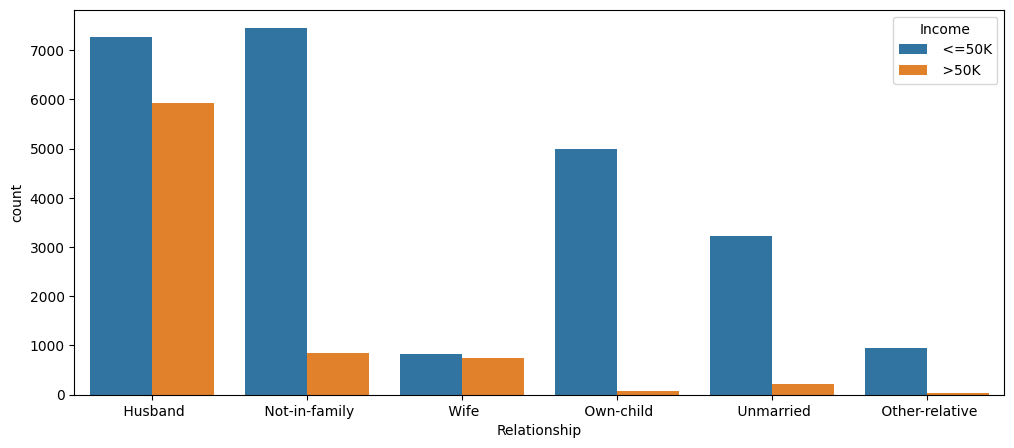

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['Relationship'],hue=df['Income'])
plt.show()

Husband and wife are has equaly ratio to earn more than 50k

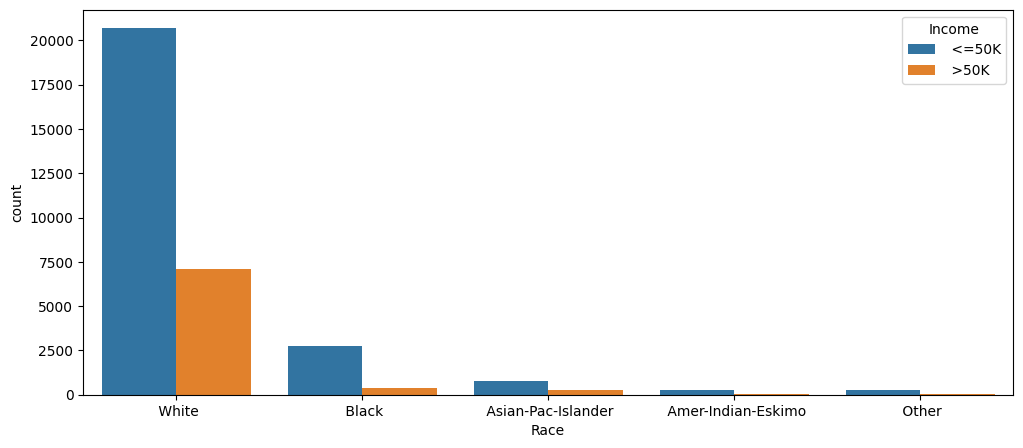

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['Race'],hue=df['Income'])
plt.show()

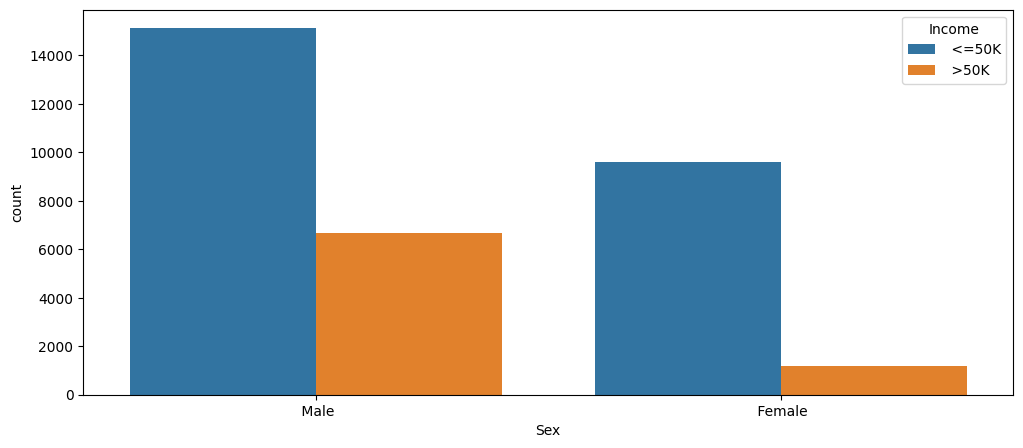

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['Sex'],hue=df['Income'])
plt.show()

more no o f men are earning more than 50k as compare to feamle

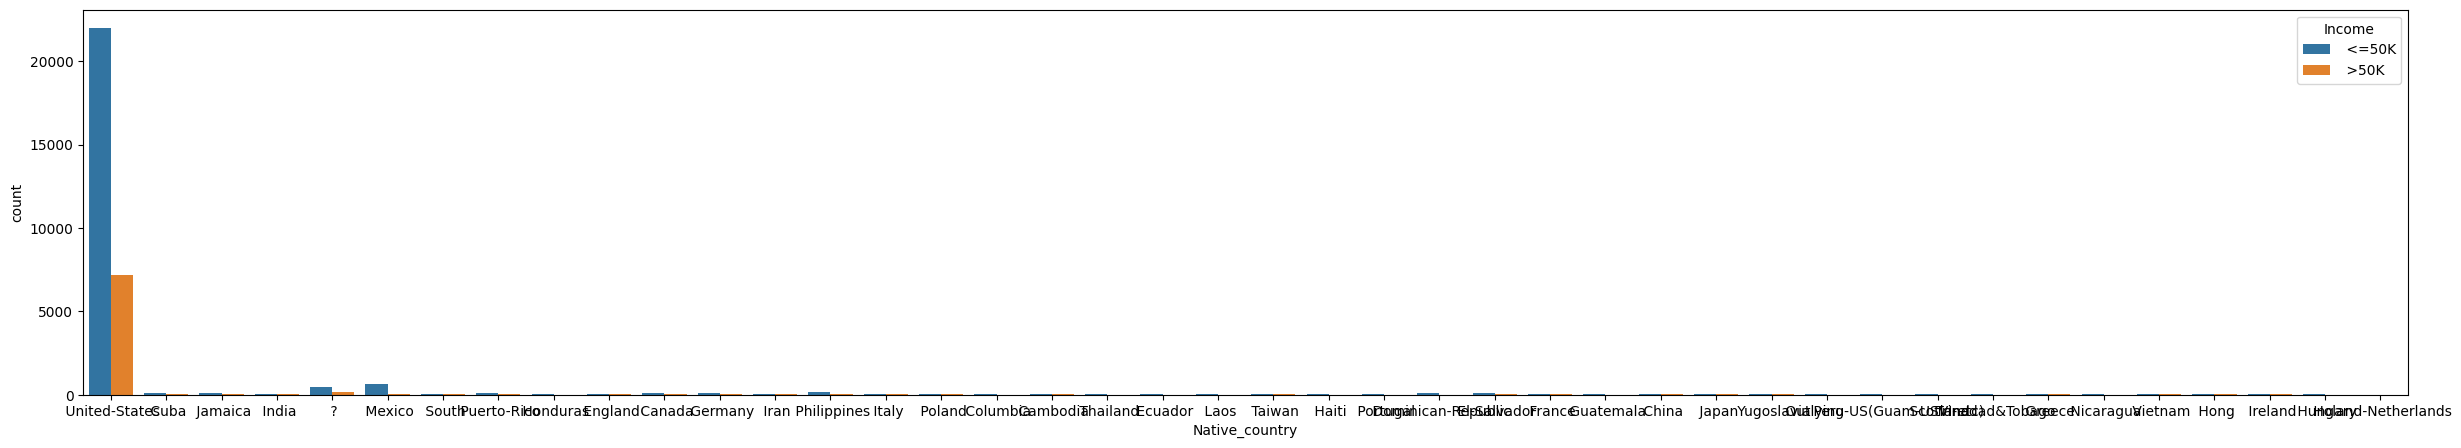

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data=df,x=df['Native_country'],hue=df['Income'])
plt.show()

mostly people's are in us country its look like data is not spread well , i have confusion on it to select it, we will practise more methods to select the features

<Axes: xlabel='Income', ylabel='count'>

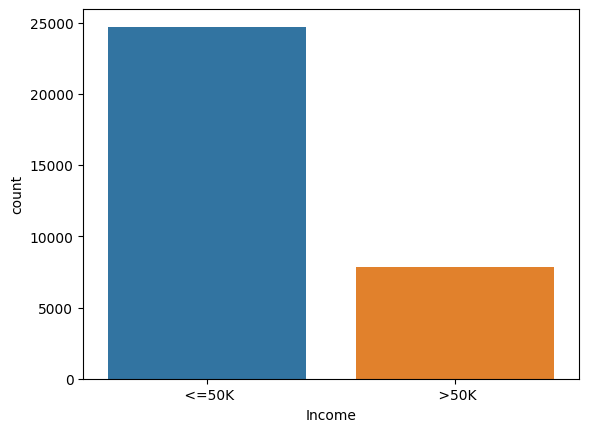

In [ ]:
sns.countplot(data=df,x=df['Income'])

In [ ]:
#feature encoding
encode=LabelEncoder()
for i in cat_f:
  df[i]=encode.fit_transform(df[i])
df['Income']=encode.fit_transform(df['Income'])

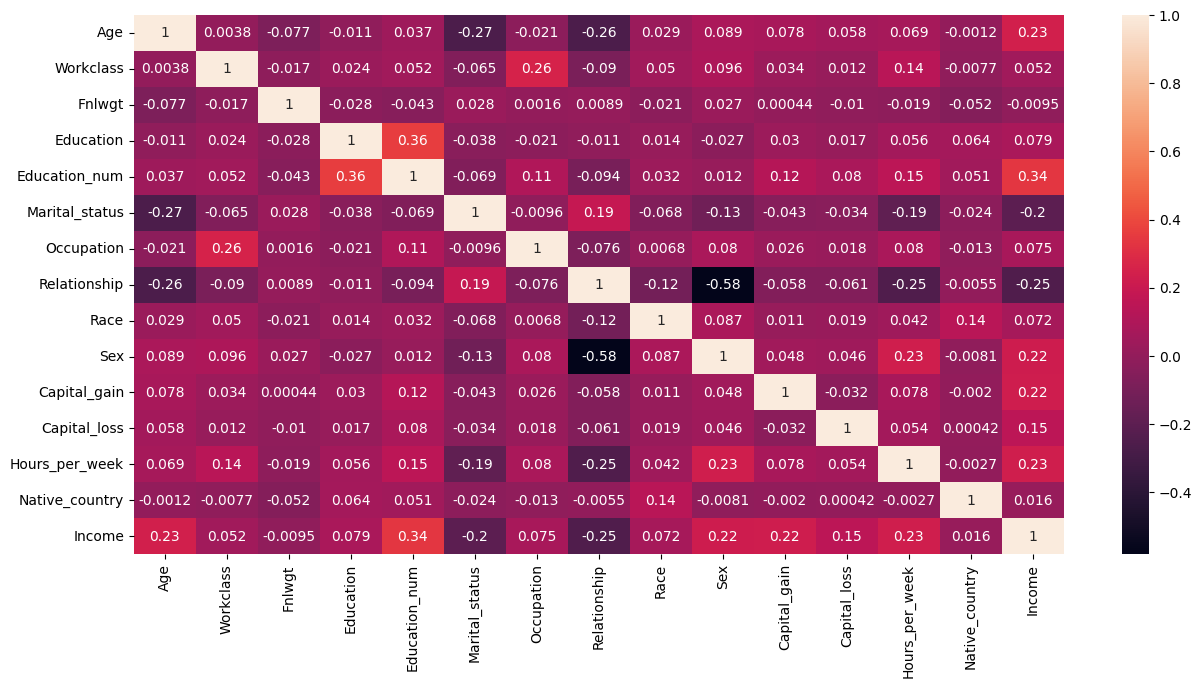

In [ ]:
#check correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

as per heatmap there is no correlation between features  
we can consider sex and relationship relation as they are has good realation with label

In [ ]:
#spliting features and label
X=df.drop('Income',axis=1)
y=df['Income']

In [ ]:
# smt=SMOTE()
# x_resampled,y_resampled=smt.fit_resample(X,y)

In [ ]:
#check multicollinearity
vif=pd.DataFrame()
vif['features']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,score
0,Age,8.521048
1,Workclass,8.476048
2,Fnlwgt,4.031761
3,Education,9.210456
4,Education_num,18.379852
5,Marital_status,3.976061
6,Occupation,3.711144
7,Relationship,2.612271
8,Race,17.577780
9,Sex,4.441515


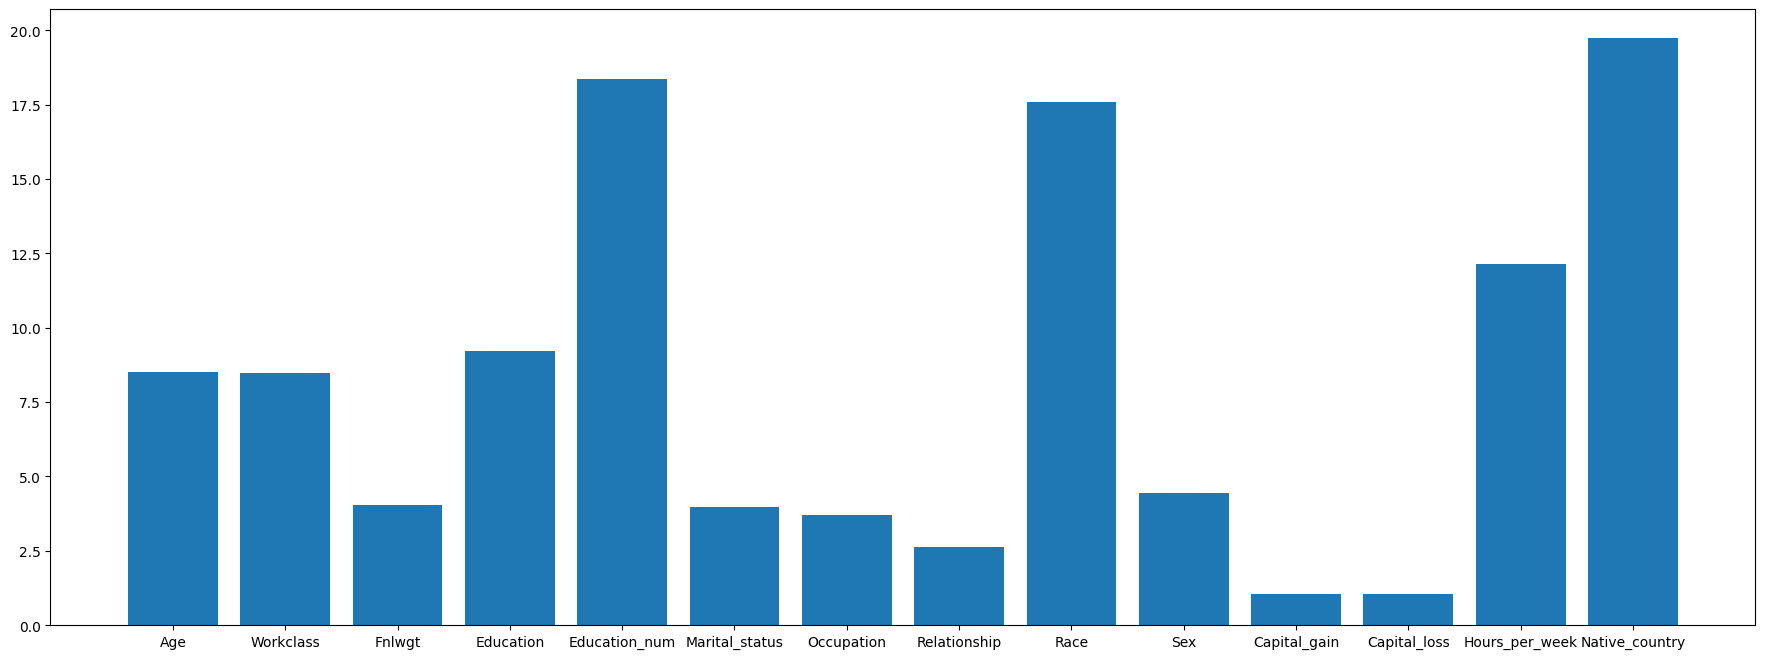

In [ ]:
#ploting vif score
plt.figure(figsize=(22,8))
plt.bar(vif['features'],vif['score'])
plt.show()

In [ ]:
# X.drop(columns=['Race','Native_country','Education_num'],axis=1,inplace=True)

In [ ]:
select=SelectKBest(score_func=f_classif,k=8)
x_best=select.fit_transform(X,y)

In [ ]:
select.get_support(indices=True)

array([ 0,  4,  5,  7,  9, 10, 11, 12])

age,edu_num,marital_status,relation,sex,captla gain & loss,hrs per week

In [ ]:
X.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

In [ ]:
#normalizing the scale of data
scal=StandardScaler()
x_scal=scal.fit_transform(x_best)

In [ ]:
#spliting training and testing data
maxscore=0
ind=0
for i in range(100):
  x_train,x_test,y_train,y_test=0,0,0,0
  x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.30,random_state=i)
  lc=LogisticRegression()
  lc.fit(x_train,y_train)
  pred=lc.predict(x_test)
  score=accuracy_score(y_test,pred)
  if score > maxscore:
    maxscore=score
    ind=i
print(f'maxscore {maxscore} at random state {ind}')

maxscore 0.8313882063882064 at random state 53


In [ ]:
#separate training and testing data
x_train,x_test,y_train,y_test=None,None,None,None
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.30,random_state=ind)

In [ ]:
#deining method for training/building model
def build_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*10,'Training Score','-'*10)
  train_score,test_score=None,None
  train_pred=alg.predict(x_train)
  train_score=accuracy_score(y_train,train_pred)
  print(train_score)
  print('\n','-'*10,'Testing Score','-'*10)
  test_pred,test_score=None,None
  test_pred=alg.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)
  print(test_score)
  print('-'*10,'Confusion Matrix','-'*10)
  print(confusion_matrix(y_test,test_pred))
  return alg,test_score


In [ ]:
#building LogisticRegression
lc,lc_test_score=build_model(LogisticRegression(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8216918216918216

 ---------- Testing Score ----------
0.8313882063882064
---------- Confusion Matrix ----------
[[7012  435]
 [1212 1109]]


In [ ]:
#building svc
svc,svc_test_score=build_model(SVC(probability=True),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.851000351000351

 ---------- Testing Score ----------
0.8525798525798526
---------- Confusion Matrix ----------
[[7021  426]
 [1014 1307]]


In [ ]:
#building KNeighborsClassifier
knc,knc_test_score=build_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8703492453492454

 ---------- Testing Score ----------
0.8323095823095823
---------- Confusion Matrix ----------
[[6748  699]
 [ 939 1382]]


In [ ]:
#building DecisionTreeClassifier
dt,dt_test_score=build_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.928044928044928

 ---------- Testing Score ----------
0.8274979524979525
---------- Confusion Matrix ----------
[[6706  741]
 [ 944 1377]]


In [ ]:
#building ExtraTreeClassifier()
et,et_test_score=build_model(ExtraTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.928044928044928

 ---------- Testing Score ----------
0.8185913185913186
---------- Confusion Matrix ----------
[[6687  760]
 [1012 1309]]


In [ ]:
#building RandomforestClassifier
rfc,rfc_test_score=build_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9279571779571779

 ---------- Testing Score ----------
0.842956592956593
---------- Confusion Matrix ----------
[[6817  630]
 [ 904 1417]]


In [ ]:
#building AdaBoostClassifier
abc,abc_test_score=build_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.855036855036855

 ---------- Testing Score ----------
0.8614864864864865
---------- Confusion Matrix ----------
[[7055  392]
 [ 961 1360]]


In [ ]:
#building GradientBoostingClassifier
gbc,gbc_test_score=build_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8621884871884872

 ---------- Testing Score ----------
0.8644553644553644
---------- Confusion Matrix ----------
[[7057  390]
 [ 934 1387]]


In [ ]:
#building XGBClassifier
xgb,xgb_test_score=build_model(XGBClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8783345033345034

 ---------- Testing Score ----------
0.8674242424242424
---------- Confusion Matrix ----------
[[6969  478]
 [ 817 1504]]


In [ ]:
#cross validation
def crosscheck(alg,test_score=None):
  cv=cross_val_score(alg,x_train,y_train)
  cvmean=round(((cv.mean())*100),2)
  testing_score=round(test_score*100,2)
  print('-'*63)
  print('|  ',cv,' |')
  print('-'*63)
  print('|  cv.mean    |    testing score    |   difference            |')
  print('-'*63)
  print(f'|  {cvmean}      |          {testing_score}      |           {round(cvmean-testing_score,2)}         |')
  print('-'*63)

In [ ]:
#Cross validation of logisticregression
crosscheck(LogisticRegression(),lc_test_score)

---------------------------------------------------------------
|   [0.82474227 0.82474227 0.81921896 0.8255814  0.81548925]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  82.2      |          83.14      |           -0.94         |
---------------------------------------------------------------


In [ ]:
#Cross validation of SVC
crosscheck(SVC(),svc_test_score)

---------------------------------------------------------------
|   [0.85435403 0.85259925 0.849276   0.85168934 0.83545415]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  84.87      |          85.26      |           -0.39         |
---------------------------------------------------------------


In [ ]:
#Cross validation of KneighborsClassifier
crosscheck(KNeighborsClassifier(),knc_test_score)

---------------------------------------------------------------
|   [0.83373547 0.83351612 0.83830627 0.8374287  0.82514261]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  83.36      |          83.23      |           0.13         |
---------------------------------------------------------------


In [ ]:
#Cross validation of DecisionTreeClassifier
crosscheck(DecisionTreeClassifier(),dt_test_score)

---------------------------------------------------------------
|   [0.82474227 0.8229875  0.82733655 0.82075472 0.81724441]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  82.26      |          82.75      |           -0.49         |
---------------------------------------------------------------


In [ ]:
#Cross validation of ExtraTreeCLassifier
crosscheck(ExtraTreeClassifier(),et_test_score)

---------------------------------------------------------------
|   [0.83373547 0.8139943  0.82272927 0.80408074 0.80978499]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  81.69      |          81.86      |           -0.17         |
---------------------------------------------------------------


In [ ]:
#Cross validation of RandomForestClassifier
crosscheck(RandomForestClassifier(),rfc_test_score)

---------------------------------------------------------------
|   [0.84755429 0.83899978 0.84598508 0.84313295 0.83084686]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  84.13      |          84.3      |           -0.17         |
---------------------------------------------------------------


In [ ]:
#Cross validation of AdaBoostClassifier
crosscheck(AdaBoostClassifier(),abc_test_score)

---------------------------------------------------------------
|   [0.85720553 0.85961834 0.8569548  0.85366389 0.8451075 ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  85.45      |          86.15      |           -0.7         |
---------------------------------------------------------------


In [ ]:
#Cross validation of GradientBoostingClassifier
crosscheck(GradientBoostingClassifier(),gbc_test_score)

---------------------------------------------------------------
|   [0.8618118  0.86290853 0.85958754 0.85980693 0.85234752]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  85.93      |          86.45      |           -0.52         |
---------------------------------------------------------------


In [ ]:
#Cross validation of XGBCLassifier
crosscheck(XGBClassifier(),xgb_test_score)

---------------------------------------------------------------
|   [0.8618118  0.86334723 0.86134269 0.86200088 0.8571742 ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  86.11      |          86.74      |           -0.63         |
---------------------------------------------------------------


On this data set XGBClassifier is working well, so I am selecting xgbclassifier

In [ ]:
#calculating probabilities
lc_prob=lc.predict_proba(x_test)[:,1]
svc_prob=svc.predict_proba(x_test)[:,1]
knc_prob=knc.predict_proba(x_test)[:,1]
dt_prob=dt.predict_proba(x_test)[:,1]
et_prob=et.predict_proba(x_test)[:,1]
rfc_prob=rfc.predict_proba(x_test)[:,1]
abc_prob=abc.predict_proba(x_test)[:,1]
gbc_prob=gbc.predict_proba(x_test)[:,1]
xgb_prob=xgb.predict_proba(x_test)[:,1]

In [ ]:
#calculating fpr,tpr and threshold
lc_fpr,lc_tpr,lc_threshold=roc_curve(y_test,lc_prob)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,svc_prob)
knc_fpr,knc_tpr,knc_threshold=roc_curve(y_test,knc_prob)
dt_fpr,dt_tpr,dt_threshold=roc_curve(y_test,dt_prob)
et_fpr,et_tpr,et_threshold=roc_curve(y_test,et_prob)
rfc_fpr,rfc_tpr,rfc_threshold=roc_curve(y_test,rfc_prob)
abc_fpr,abc_tpr,abc_threshold=roc_curve(y_test,abc_prob)
gbc_fpr,gbc_tpr,gbc_threshold=roc_curve(y_test,gbc_prob)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_test,xgb_prob)

In [ ]:
#calculating auc score
lc_auc=roc_auc_score(y_test,lc_prob)
svc_auc=roc_auc_score(y_test,svc_prob)
knc_auc=roc_auc_score(y_test,knc_prob)
dt_auc=roc_auc_score(y_test,dt_prob)
et_auc=roc_auc_score(y_test,et_prob)
rfc_auc=roc_auc_score(y_test,rfc_prob)
abc_auc=roc_auc_score(y_test,abc_prob)
gbc_auc=roc_auc_score(y_test,gbc_prob)
xgb_auc=roc_auc_score(y_test,xgb_prob)

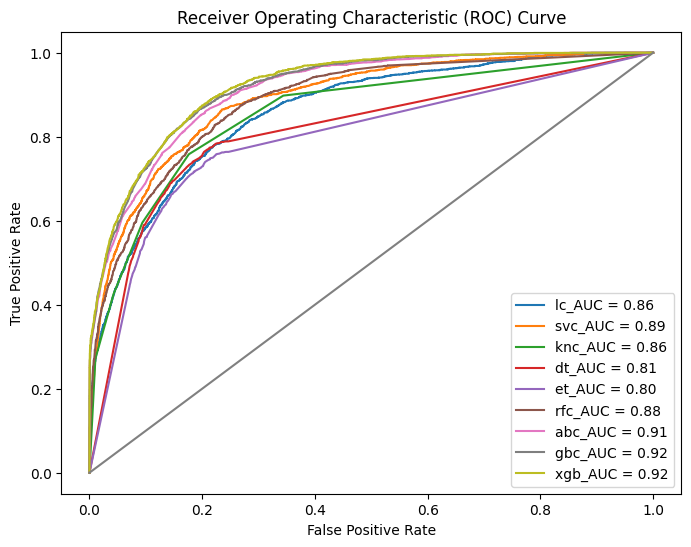

In [ ]:
#ploting roc curve
plt.figure(figsize=(8, 6))
plt.plot(lc_fpr, lc_tpr, label=f'lc_AUC = {lc_auc:.2f}')
plt.plot(svc_fpr, svc_tpr, label=f'svc_AUC = {svc_auc:.2f}')
plt.plot(knc_fpr, knc_tpr, label=f'knc_AUC = {knc_auc:.2f}')
plt.plot(dt_fpr, dt_tpr, label=f'dt_AUC = {dt_auc:.2f}')
plt.plot(et_fpr, et_tpr, label=f'et_AUC = {et_auc:.2f}')
plt.plot(rfc_fpr, rfc_tpr, label=f'rfc_AUC = {rfc_auc:.2f}')
plt.plot(abc_fpr, abc_tpr, label=f'abc_AUC = {abc_auc:.2f}')
plt.plot(gbc_fpr, gbc_tpr, label=f'gbc_AUC = {gbc_auc:.2f}')
plt.plot(xgb_fpr, xgb_tpr, label=f'xgb_AUC = {xgb_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

area under the curve of xgbclassifier is high as compare to other models, gradientboosting is also having same area under the curve but cv score is less

In [ ]:
#parameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300,350],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],

}



grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)


print("Best parameters:", grid_result.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
#training xgbclassifier with tunned parameter
tunned_xgb,tun_xgb_test_score=build_model(XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300,colsample_bytree=0.8,subsample=1.0),x_train,x_test,y_train,y_test)


---------- Training Score ----------
0.8737714987714987

 ---------- Testing Score ----------
0.8688574938574939
---------- Confusion Matrix ----------
[[7009  438]
 [ 843 1478]]


In [ ]:
crosscheck(XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=300),tun_xgb_test_score)

---------------------------------------------------------------
|   [0.86751481 0.86751481 0.86178148 0.86265906 0.85629662]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |   difference            |
---------------------------------------------------------------
|  86.32      |          86.89      |           -0.57         |
---------------------------------------------------------------


In [ ]:
#model saving
import pickle as pkl
pkl.dump(tunned_xgb,open('census_pred_xgb.sav','wb'))

In [ ]:
#model loading
model=pkl.load(open('census_pred_xgb.sav','rb'))

In [ ]:
#comparing original and predicted label
cmp_df=pd.DataFrame()
cmp_df['Org_Income']=y_test
cmp_df['pred_Income']=model.predict(x_test)
cmp_df

,Org_Income,pred_Income
3161,0,0
29619,0,0
31001,0,0
32202,1,1
3391,0,1
...,...,...
29566,1,1
28677,1,0
13663,0,0
5880,0,0
